In [87]:
import sys
sys.path.append("../")
import numpy as np
import os
import glob
import cv2
import csv
from utils import findCentroid, find_boundaries
import pandas as pd
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
from pathlib import Path
import napari
from numpy import diff, polyfit
from scipy import interpolate
import math
from scipy.interpolate import interp1d
refvec = [0, 1]
def clockwiseangle_and_distance(point):
    # Vector between point and the origin: v = p - o
    vector = [point[0], point[1]]
    # Length of vector: ||v||
    lenvector = math.hypot(vector[0], vector[1])
    # If length is zero there is no angle
    if lenvector == 0:
        return -math.pi, 0
    # Normalize vector: v/||v||
    normalized = [vector[0]/lenvector, vector[1]/lenvector]
    dotprod  = normalized[0]*refvec[0] + normalized[1]*refvec[1]     # x1*x2 + y1*y2
    diffprod = refvec[1]*normalized[0] - refvec[0]*normalized[1]     # x1*y2 - y1*x2
    angle = math.atan2(diffprod, dotprod)
    # Negative angles represent counter-clockwise angles so we need to subtract them 
    # from 2*pi (360 degrees)
    if angle < 0:
        return 2*math.pi+angle, lenvector
    # I return first the angle because that's the primary sorting criterium
    # but if two vectors have the same angle then the shorter distance should come first.
    return angle, lenvector

In [88]:
Wing = '/home/sancere/Desktop/bucket.tif'

fitdegree = 2


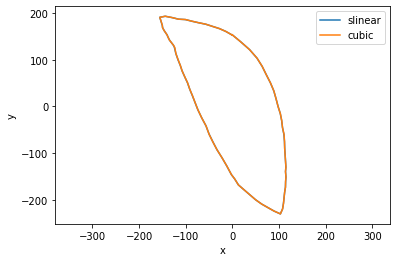

In [91]:
SurfaceImage = find_boundaries(imread(Wing).astype('float32'))
          
centroid, coords = findCentroid(SurfaceImage.astype('uint16'))
coords = coords - centroid
coords = sorted(coords, key=clockwiseangle_and_distance)
X = []
Y = []

for i in range(0, len(coords)):
   X.append(coords[i][0])
   Y.append(coords[i][1])
points = np.array([X, Y]).T
# Linear length along the line:
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)/distance[-1]

# Interpolation for different methods:
interpolations_methods = ['slinear', 'quadratic', 'cubic']
alpha = np.linspace(0, 1, 75)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)
for method_name, curve in interpolated_points.items():
    plt.plot(*curve.T, '-', label=method_name);

#plt.plot(*points.T, 'ok', label='original points');
plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');

/Users/aimachine/opt/anaconda3/envs/NapariTrack/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


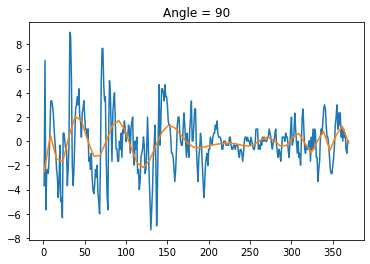

Anterior Deformation: Mean =  -0.09167736378681109 Standard Deviation =  0.9785568689513302


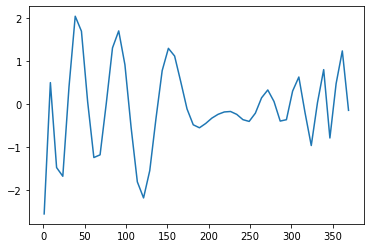

In [11]:
AnteriorAveragePoly = 0

for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
        for i in range(0, len(AnteriorAngles)):
                
                if angle == str(AnteriorAngles[i]):
                        timeddistance = DistAverage(timeddistance, 3)
                        timeddistance = [i * Xcalibration/Timeunit for i in timeddistance]
                        deformation = diff(timeddistance)
                        coefficients = polyfit(time[1:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[1:],deformation)
                        Anteriornew_x = np.linspace(time[1:][0], time[1:][-1])
                        Anteriornew_y = poly(Anteriornew_x)
                        AnteriorAveragePoly = AnteriorAveragePoly + Anteriornew_y
                        plt.plot(Anteriornew_x,Anteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
plt.plot(Anteriornew_x,AnteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(AnteriorAveragePoly), 'Standard Deviation = ', np.std(AnteriorAveragePoly))
                        

/Users/aimachine/opt/anaconda3/envs/NapariTrack/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


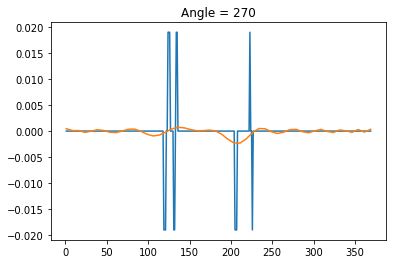

Anterior Deformation: Mean =  -0.0001349070039958807 Standard Deviation =  0.0006297489726181355


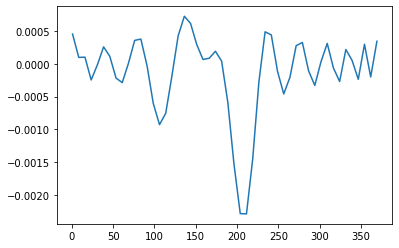

In [12]:
PosteriorAveragePoly = 0
for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
        for i in range(0, len(PosteriorAngles)):
                
                if angle == str(PosteriorAngles[i]):
                        timeddistance = DistAverage(timeddistance, 3)
                        timeddistance = [i * Xcalibration/Timeunit for i in timeddistance]
                        deformation = diff(timeddistance)
                        coefficients = polyfit(time[1:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[1:],deformation)
                        Posteriornew_x = np.linspace(time[1:][0], time[1:][-1])
                        Posteriornew_y = poly(Posteriornew_x)
                        PosteriorAveragePoly = PosteriorAveragePoly + Posteriornew_y
                        plt.plot(Posteriornew_x,Posteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
                       
plt.plot(Posteriornew_x,PosteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(PosteriorAveragePoly), 'Standard Deviation = ', np.std(PosteriorAveragePoly))
                        

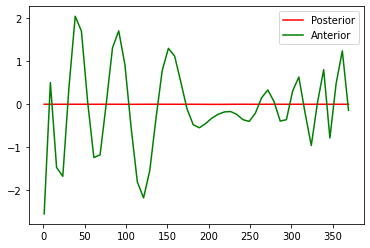

In [13]:
fig, ax = plt.subplots()
ax.plot(Posteriornew_x,PosteriorAveragePoly, 'r',Posteriornew_x,AnteriorAveragePoly, 'g' ) 

ax.legend(('Posterior', 'Anterior'),
           loc='upper right', shadow=False)
fig.savefig(savedir + "comparison" + '.png', dpi=300, bbox_inches='tight',facecolor= "white")